In [1]:
import sklearn
import streamlit as st

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import scikitplot as skplt
from joblib import dump, load
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
news_groups=datasets.fetch_20newsgroups()
news_groups.target_names

2023-08-13 15:04:21.859 INFO    sklearn.datasets._twenty_newsgroups: Downloading 20news dataset. This may take a few minutes.
2023-08-13 15:04:21.863 INFO    sklearn.datasets._twenty_newsgroups: Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
news_groups=datasets.fetch_20newsgroups (categories = ['alt.atheism', 'comp.graphics', 'rec.autos', 'sci.electronics', 'talk.politics.guns',])

In [6]:
news_groups.target_names

['alt.atheism',
 'comp.graphics',
 'rec.autos',
 'sci.electronics',
 'talk.politics.guns']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(news_groups.data, news_groups.target, train_size=0.8, random_state=123)

In [10]:
## Vectorize Data
vectorizer = CountVectorizer(max_features=50_000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
rf_classif = RandomForestClassifier()
rf_classif.fit(X_train_vec, Y_train)

RandomForestClassifier()

In [15]:
Y_train_preds = rf_classif.predict(X_train_vec)
Y_train_preds[:5]        

array([0, 1, 4, 3, 0], dtype=int64)

In [17]:
Y_test_preds = rf_classif.predict(X_test_vec)
Y_test_preds[:5]  

array([2, 4, 3, 0, 4], dtype=int64)

In [24]:
print("Test Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))

print("Test Accuracy : {:.2f}".format(accuracy_score(Y_train, Y_train_preds)))

print("\n Confusion Matrix :")
print(confusion_matrix(Y_test,Y_test_preds))


print("\n Classification Report :")
print(classification_report(Y_test,Y_test_preds,target_names=news_groups.target_names))

Test Accuracy : 0.92
Test Accuracy : 1.00

 Confusion Matrix :
[[ 88   2   0   1   1]
 [  1 119   1   1   0]
 [  0   7 113   4   0]
 [  0  16   4  93   0]
 [  1   2   4   1 100]]

 Classification Report :
                    precision    recall  f1-score   support

       alt.atheism       0.98      0.96      0.97        92
     comp.graphics       0.82      0.98      0.89       122
         rec.autos       0.93      0.91      0.92       124
   sci.electronics       0.93      0.82      0.87       113
talk.politics.guns       0.99      0.93      0.96       108

          accuracy                           0.92       559
         macro avg       0.93      0.92      0.92       559
      weighted avg       0.92      0.92      0.92       559



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

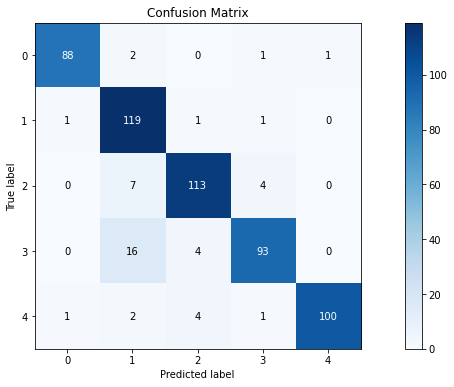

In [33]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(Y_test, Y_test_preds, ax=ax1)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

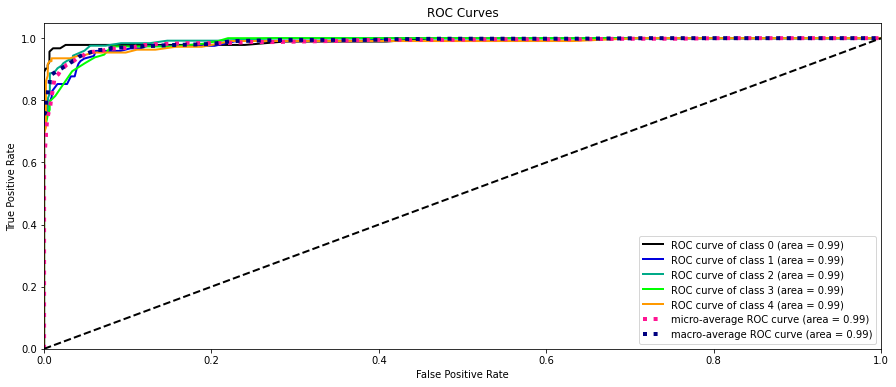

In [32]:
Y_test_probs=rf_classif.predict_proba(X_test_vec)
roc_fig = plt.figure(figsize=(15,6))
ax1 = roc_fig.add_subplot(111)
skplt.metrics.plot_roc(Y_test, Y_test_probs, ax=ax1)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

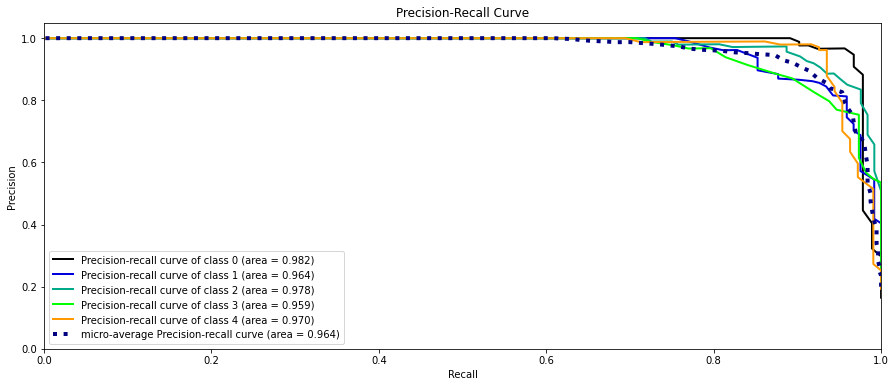

In [34]:
Y_test_probs=rf_classif.predict_proba(X_test_vec)
roc_fig = plt.figure(figsize=(15,6))
ax1 = roc_fig.add_subplot(111)
skplt.metrics.plot_precision_recall(Y_test, Y_test_probs, ax=ax1)

In [35]:
dump(rf_classif,'rf_classif.model')

['rf_classif.model']

In [36]:
rf_classif_2=load("rf_classif.model")
rf_classif_2

RandomForestClassifier()

In [37]:
Y_train_preds=rf_classif_2.predict(X_train_vec)
Y_test_preds=rf_classif_2.predict(X_test_vec)


print("Test Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))

print("Test Accuracy : {:.2f}".format(accuracy_score(Y_train, Y_train_preds)))

print("\n Confusion Matrix :")
print(confusion_matrix(Y_test,Y_test_preds))


print("\n Classification Report :")
print(classification_report(Y_test,Y_test_preds,target_names=news_groups.target_names))

Test Accuracy : 0.92
Test Accuracy : 1.00

 Confusion Matrix :
[[ 88   2   0   1   1]
 [  1 119   1   1   0]
 [  0   7 113   4   0]
 [  0  16   4  93   0]
 [  1   2   4   1 100]]

 Classification Report :
                    precision    recall  f1-score   support

       alt.atheism       0.98      0.96      0.97        92
     comp.graphics       0.82      0.98      0.89       122
         rec.autos       0.93      0.91      0.92       124
   sci.electronics       0.93      0.82      0.87       113
talk.politics.guns       0.99      0.93      0.96       108

          accuracy                           0.92       559
         macro avg       0.93      0.92      0.92       559
      weighted avg       0.92      0.92      0.92       559

